In [29]:
import os
import numpy as np
import pandas as pd
from scipy.sparse import load_npz


# Load your features and labels
features_dir = 'emotionverse_features_advanced'
X_tfidf = load_npz(os.path.join(features_dir, 'tfidf_features.npz')) #sim
X_bow = load_npz(os.path.join(features_dir, 'bow_features.npz'))  # sim 
labels_df = pd.read_csv(os.path.join(features_dir, 'emotionverse_labels.csv')) # sim
allminipro = np.load(os.path.join(features_dir, 'sentence_embeddings.npy')) #simm
tf_lexi = np.load(os.path.join(features_dir, 'tf_lexi.npy'),allow_pickle=True).item() # sim
tf_vader_file = np.load(os.path.join(features_dir, 'tf_vader_file.npy'),allow_pickle=True).item() #sim 
bert_vader_file = np.load(os.path.join(features_dir, 'bert_vader_file.npy'),allow_pickle=True).item()# sim
bert_lexi = np.load(os.path.join(features_dir, 'bert_lexi.npy'),allow_pickle=True).item() #sim
tf_bert_vader_file = np.load(os.path.join(features_dir, 'tf_bert_vader_file.npy'),allow_pickle=True).item() #sim  
tf_bert_lexi = np.load(os.path.join(features_dir, 'tf_bert_lexi.npy'),allow_pickle=True).item() #sim  
lexicon_features = np.load(os.path.join(features_dir, 'custom_lexicon_features.npy'),allow_pickle=True) 




In [31]:
import numpy as np

X = combined_vader_bert
print("Min:", np.min(X))
print("Max:", np.max(X))
print("Mean:", np.mean(X))


Min: 0.0
Max: 0.758740295985194
Mean: 0.19999999999999998


In [32]:
combined_vader_bert

array([[0.37644012, 0.18260558, 0.34237587, 0.00642791, 0.09215052],
       [0.18958147, 0.12708771, 0.55537415, 0.01302693, 0.11492974],
       [0.42167034, 0.15941372, 0.32838388, 0.02462409, 0.06590798],
       ...,
       [0.25987047, 0.562432  , 0.08398702, 0.05955138, 0.03415913],
       [0.31016748, 0.16050278, 0.42473564, 0.05049747, 0.05409663],
       [0.15334246, 0.65418891, 0.12011544, 0.03980564, 0.03254755]])

In [33]:
print(labels_df["sentiment"].value_counts())


sentiment
Mixed        652
Positive     542
Negative     419
Ambiguous    158
Neutral      103
Name: count, dtype: int64



----- Sentiment Classification Results (TF-IDF) -----

Training Logistic Regression...
              precision    recall  f1-score   support

   Ambiguous       0.75      0.09      0.17        32
       Mixed       0.67      0.79      0.73       130
    Negative       0.68      0.82      0.74        84
     Neutral       1.00      0.48      0.65        21
    Positive       0.79      0.78      0.79       108

    accuracy                           0.72       375
   macro avg       0.78      0.59      0.61       375
weighted avg       0.73      0.72      0.69       375


Training Linear SVM...
              precision    recall  f1-score   support

   Ambiguous       1.00      0.06      0.12        32
       Mixed       0.63      0.85      0.72       130
    Negative       0.71      0.81      0.76        84
     Neutral       1.00      0.52      0.69        21
    Positive       0.87      0.74      0.80       108

    accuracy                           0.72       375
   macro avg       

c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

   Ambiguous       0.00      0.00      0.00        32
       Mixed       0.66      0.70      0.68       130
    Negative       0.63      0.87      0.73        84
     Neutral       1.00      0.48      0.65        21
    Positive       0.76      0.80      0.78       108

    accuracy                           0.69       375
   macro avg       0.61      0.57      0.57       375
weighted avg       0.65      0.69      0.66       375


----- Sentiment Classification Results (TF-BERT-Lexicon) -----

Training Logistic Regression...
              precision    recall  f1-score   support

   Ambiguous       0.90      0.56      0.69        32
       Mixed       0.87      0.89      0.88       130
    Negative       0.83      0.94      0.88        84
     Neutral       0.89      0.76      0.82        21
    Positive       0.90      0.91      0.90       108

    accuracy                           0.87       375
   macro avg       0.88      0.81 

<Figure size 1500x1000 with 0 Axes>

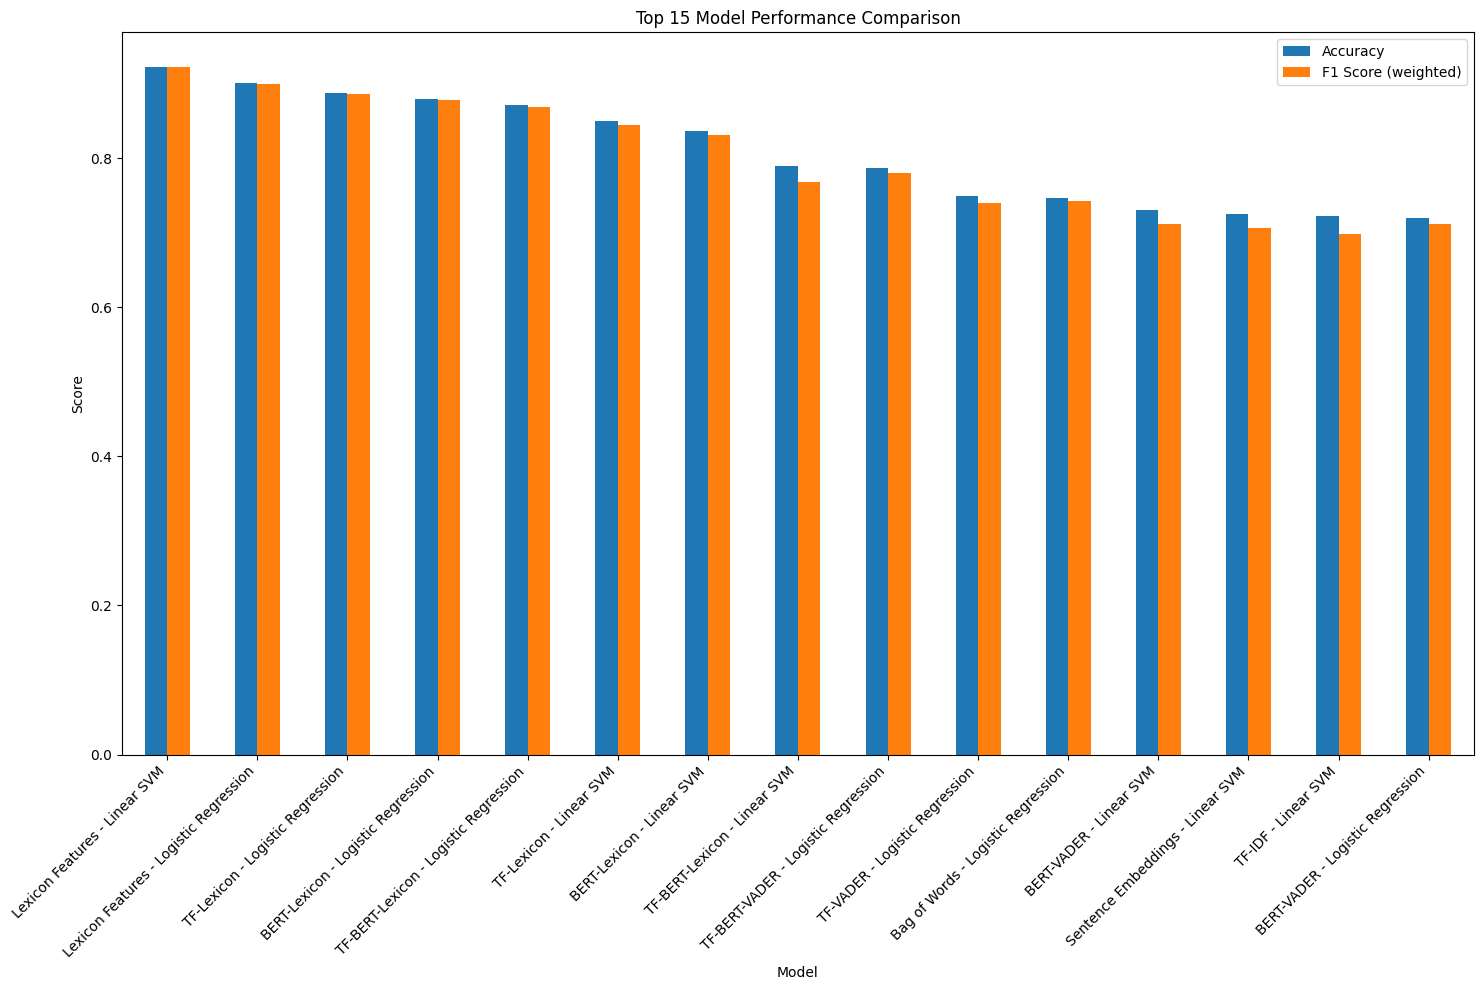

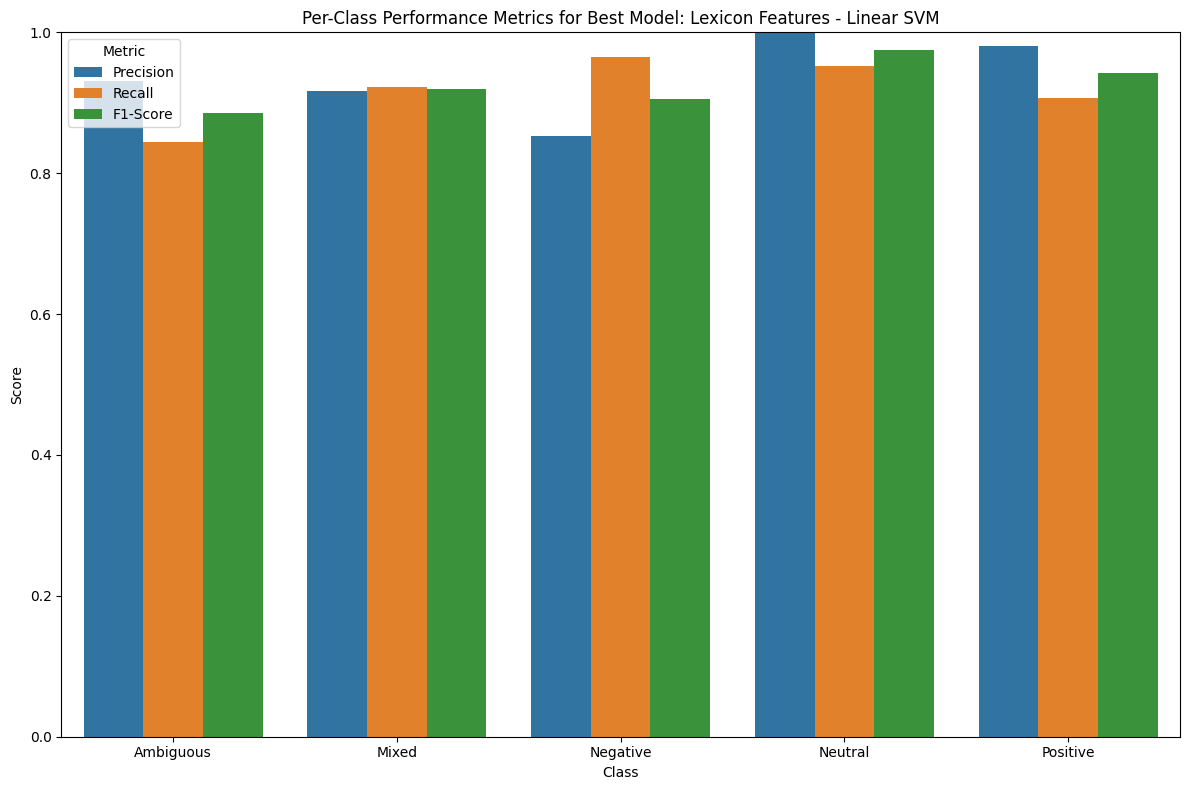


----- Feature Combination Analysis -----
Best in Traditional group: Bag of Words - Logistic Regression
  Accuracy: 0.7467
  F1 Score: 0.7427
Best in Embedding-based group: Sentence Embeddings - Linear SVM
  Accuracy: 0.7253
  F1 Score: 0.7067
Best in Lexicon-based group: Lexicon Features - Linear SVM
  Accuracy: 0.9227
  F1 Score: 0.9231
Best in Sentiment Lexicon group: TF-BERT-VADER - Logistic Regression
  Accuracy: 0.7867
  F1 Score: 0.7810
Best in Combined Features group: TF-BERT-Lexicon - Logistic Regression
  Accuracy: 0.8720
  F1 Score: 0.8687


<Figure size 2000x1200 with 0 Axes>

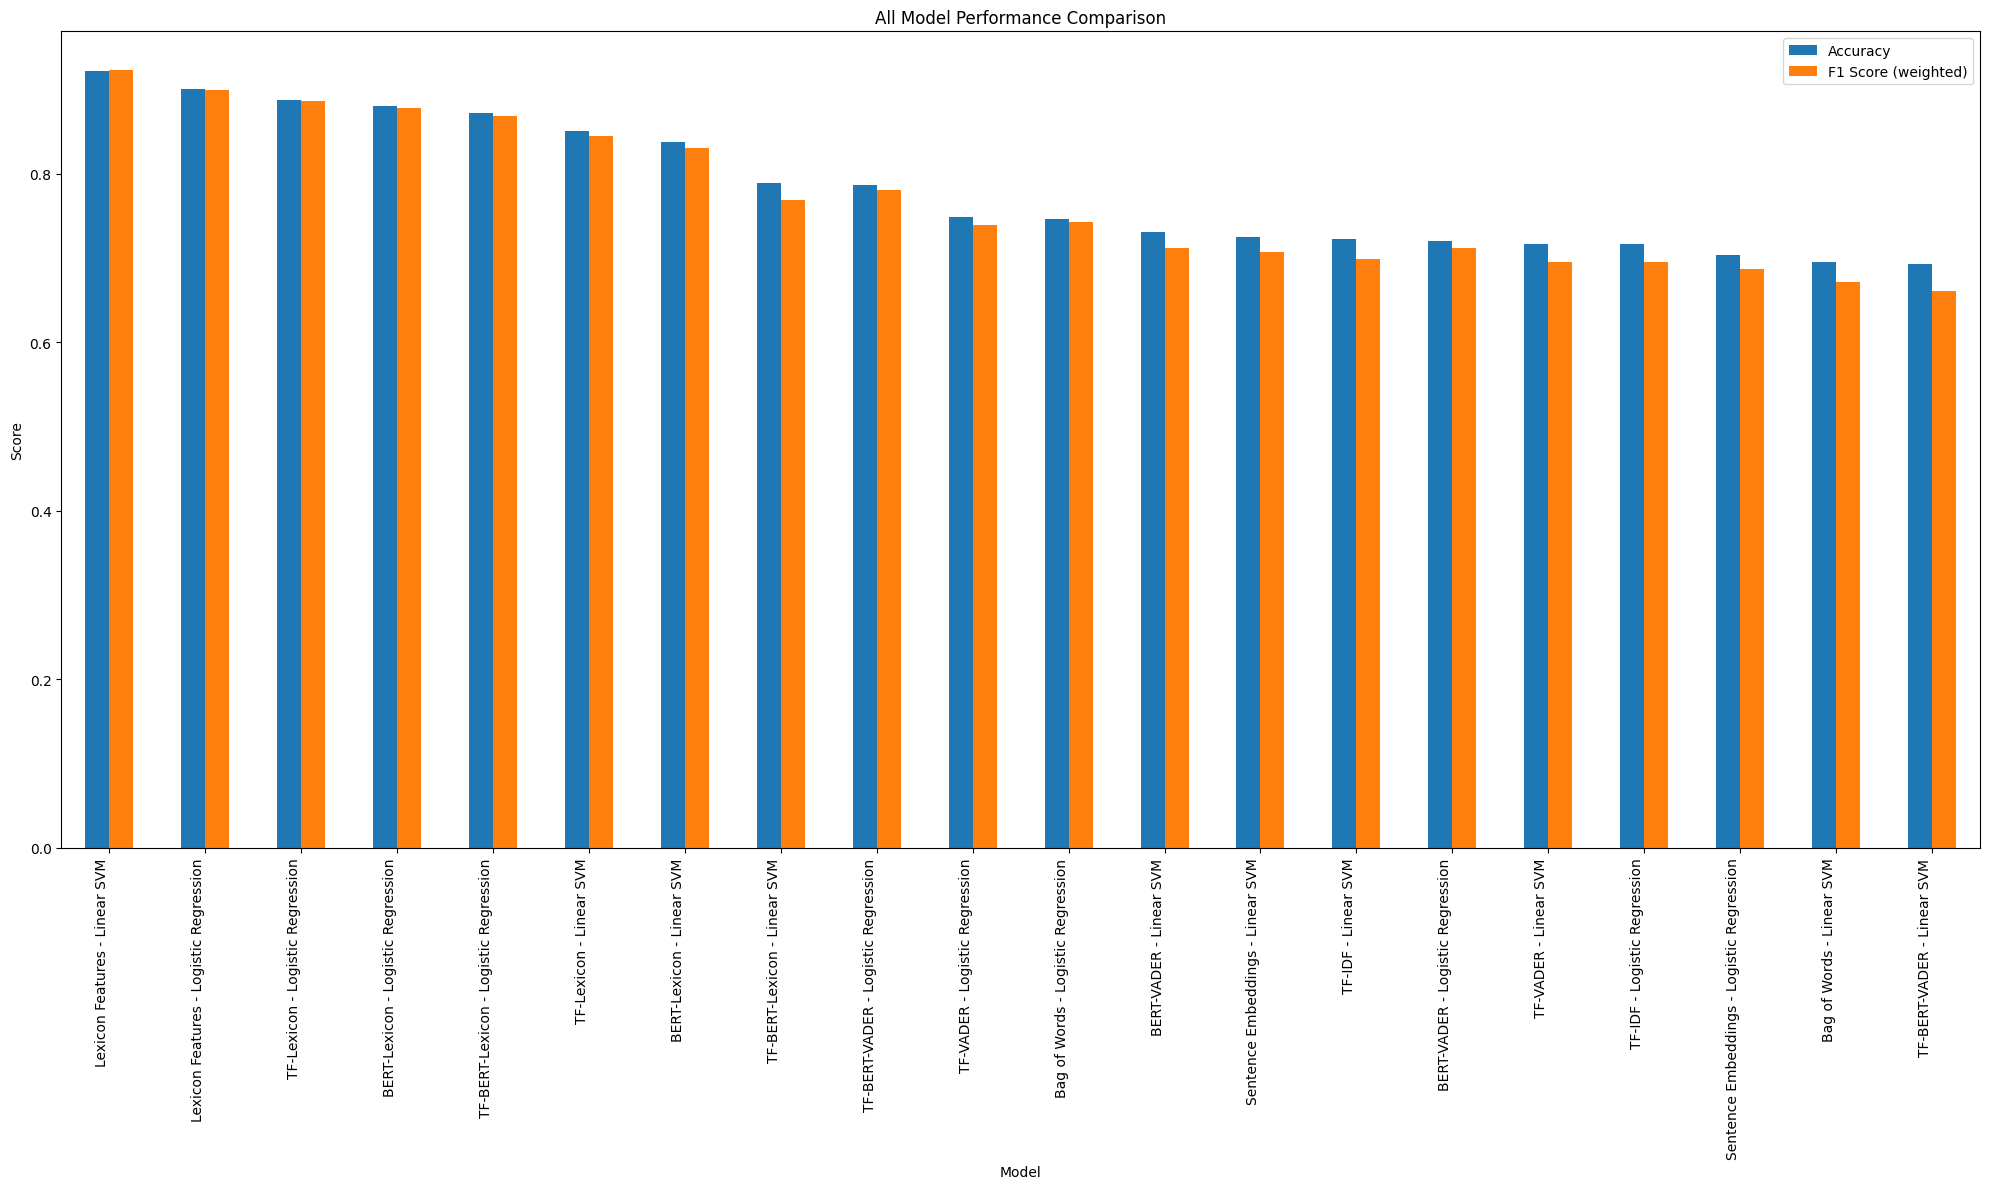

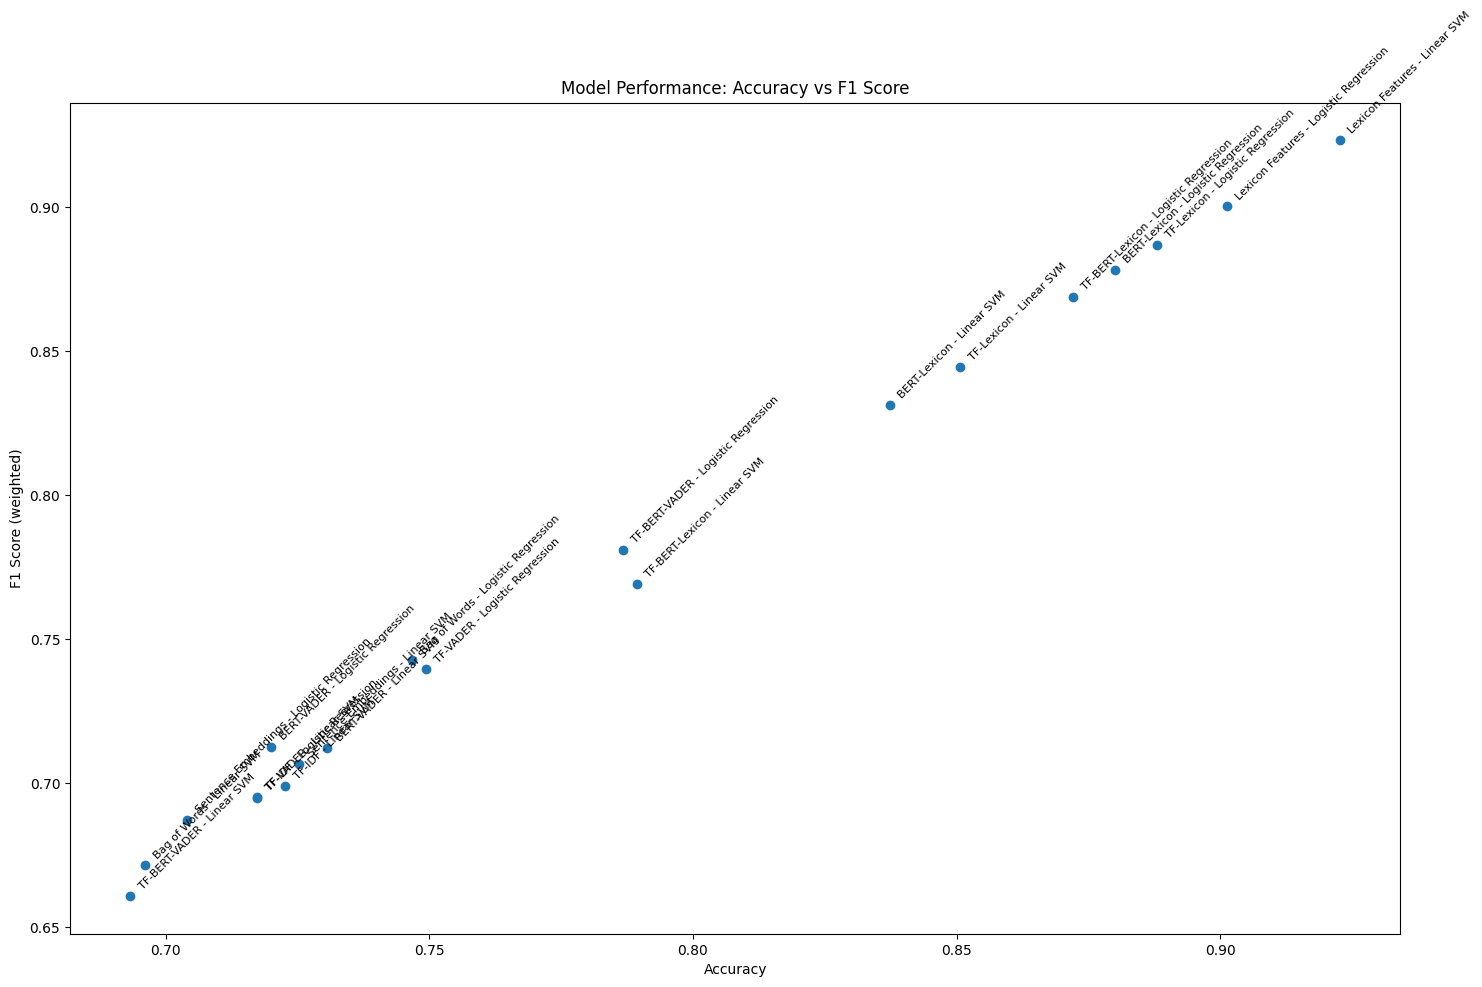


Analysis Complete! Check the generated plots and saved files.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Extract sentiment labels
y_sentiment = labels_df['sentiment']

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Linear SVM': SVC(C=1.0, max_iter=10000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bow_train, X_bow_test, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_allminipro_train, X_allminipro_test, y_train_allminipro, y_test_allminipro = train_test_split(
    allminipro, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_lexi_train, X_tf_lexi_test, y_train_tf_lexi, y_test_tf_lexi = train_test_split(
    tf_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_vader_train, X_tf_vader_test, y_train_tf_vader, y_test_tf_vader = train_test_split(
    tf_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bert_vader_train, X_bert_vader_test, y_train_bert_vader, y_test_bert_vader = train_test_split(
    bert_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bert_lexi_train, X_bert_lexi_test, y_train_bert_lexi, y_test_bert_lexi = train_test_split(
    bert_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_bert_vader_train, X_tf_bert_vader_test, y_train_tf_bert_vader, y_test_tf_bert_vader = train_test_split(
    tf_bert_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_bert_lexi_train, X_tf_bert_lexi_test, y_train_tf_bert_lexi, y_test_tf_bert_lexi = train_test_split(
    tf_bert_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_lexicon_train, X_lexicon_test, y_train_lexicon, y_test_lexicon = train_test_split(
    lexicon_features, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# 🚀 Function to Evaluate Models and Display Results
def evaluate_models(X_train, X_test, y_train, y_test, models, feature_name):
    results = {}
    print(f"\n----- Sentiment Classification Results ({feature_name}) -----")
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store model performance
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'accuracy': report['accuracy'],
            'weighted_f1': report['weighted avg']['f1-score'],
            'model': model
        }
        
        # Print classification report
        print(classification_report(y_test, y_pred))
        
        # Create and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=sorted(y_test.unique()), 
                    yticklabels=sorted(y_test.unique()))
        plt.title(f'Confusion Matrix: {feature_name} - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.close()
    
    return results

# 🚀 Evaluate All Feature Types
tfidf_results = evaluate_models(X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf, models, "TF-IDF")
bow_results = evaluate_models(X_bow_train, X_bow_test, y_train_bow, y_test_bow, models, "Bag of Words")
allminipro_results = evaluate_models(X_allminipro_train, X_allminipro_test, y_train_allminipro, y_test_allminipro, models, "Sentence Embeddings")
tf_lexi_results = evaluate_models(X_tf_lexi_train, X_tf_lexi_test, y_train_tf_lexi, y_test_tf_lexi, models, "TF-Lexicon")
tf_vader_results = evaluate_models(X_tf_vader_train, X_tf_vader_test, y_train_tf_vader, y_test_tf_vader, models, "TF-VADER")
bert_vader_results = evaluate_models(X_bert_vader_train, X_bert_vader_test, y_train_bert_vader, y_test_bert_vader, models, "BERT-VADER")
bert_lexi_results = evaluate_models(X_bert_lexi_train, X_bert_lexi_test, y_train_bert_lexi, y_test_bert_lexi, models, "BERT-Lexicon")
tf_bert_vader_results = evaluate_models(X_tf_bert_vader_train, X_tf_bert_vader_test, y_train_tf_bert_vader, y_test_tf_bert_vader, models, "TF-BERT-VADER")
tf_bert_lexi_results = evaluate_models(X_tf_bert_lexi_train, X_tf_bert_lexi_test, y_train_tf_bert_lexi, y_test_tf_bert_lexi, models, "TF-BERT-Lexicon")
lexicon_results = evaluate_models(X_lexicon_train, X_lexicon_test, y_train_lexicon, y_test_lexicon, models, "Lexicon Features")

# 🚀 Combine All Results for Comparison
all_results = {}
feature_names = [
    "TF-IDF", "Bag of Words", "Sentence Embeddings", 
    "TF-Lexicon", "TF-VADER", "BERT-VADER", "BERT-Lexicon",
    "TF-BERT-VADER", "TF-BERT-Lexicon", "Lexicon Features"
]
result_sets = [
    tfidf_results, bow_results, allminipro_results, 
    tf_lexi_results, tf_vader_results, bert_vader_results, 
    bert_lexi_results, tf_bert_vader_results, 
    tf_bert_lexi_results, lexicon_results
]

for feature_name, results in zip(feature_names, result_sets):
    for model_name, metrics in results.items():
        key = f"{feature_name} - {model_name}"
        all_results[key] = metrics

# 🚀 Create Comparison Table
comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# 🚀 Sort by Accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# 🚀 Display and Save Comparison Results
print("\n----- Overall Model Comparison -----")
print(comparison_df)
comparison_df.to_csv('sentiment_model_comparison_advanced.csv', index=False)

# 🚀 Plot Comparison Bar Chart
plt.figure(figsize=(15, 10))
ax = comparison_df.head(15).plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(15, 10))
plt.title('Top 15 Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 🚀 Find the Best Model
best_model_row = comparison_df.iloc[0]
print(f"\nBest performing model: {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score (weighted)']:.4f}")

# 🚀 Save the best model
feature_type, model_type = best_model_row['Model'].split(' - ')
best_model = None

# Mapping of feature types to their corresponding results
feature_results_map = {
    "TF-IDF": tfidf_results,
    "Bag of Words": bow_results,
    "Sentence Embeddings": allminipro_results,
    "TF-Lexicon": tf_lexi_results,
    "TF-VADER": tf_vader_results,
    "BERT-VADER": bert_vader_results,
    "BERT-Lexicon": bert_lexi_results,
    "TF-BERT-VADER": tf_bert_vader_results,
    "TF-BERT-Lexicon": tf_bert_lexi_results,
    "Lexicon Features": lexicon_results
}

if feature_type in feature_results_map:
    best_model = feature_results_map[feature_type][model_type]['model']

if best_model:
    # Save the model
    joblib.dump(best_model, 'best_sentiment_model.pkl')
    print(f"Best model saved as 'best_sentiment_model.pkl'")
    
    # Save feature type and preprocessing info
    model_info = {
        'feature_type': feature_type,
        'model_type': model_type,
        'accuracy': best_model_row['Accuracy'],
        'f1_score': best_model_row['F1 Score (weighted)']
    }
    
    with open('best_model_info.joblib', 'wb') as f:
        joblib.dump(model_info, f)
    
    # Determine which test set to use based on the best model's feature type
    test_set_map = {
        "TF-IDF": (X_tfidf_test, y_test_tfidf),
        "Bag of Words": (X_bow_test, y_test_bow),
        "Sentence Embeddings": (X_allminipro_test, y_test_allminipro),
        "TF-Lexicon": (X_tf_lexi_test, y_test_tf_lexi),
        "TF-VADER": (X_tf_vader_test, y_test_tf_vader),
        "BERT-VADER": (X_bert_vader_test, y_test_bert_vader),
        "BERT-Lexicon": (X_bert_lexi_test, y_test_bert_lexi),
        "TF-BERT-VADER": (X_tf_bert_vader_test, y_test_tf_bert_vader),
        "TF-BERT-Lexicon": (X_tf_bert_lexi_test, y_test_tf_bert_lexi),
        "Lexicon Features": (X_lexicon_test, y_test_lexicon)
    }
    
    X_test, y_test = test_set_map.get(feature_type, (None, None))
    
    # Create a detailed visualization of model performance
    if X_test is not None:
        # Predict on the test set
        y_pred = best_model.predict(X_test)
        
        # Get detailed classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Extract class metrics
        class_metrics = {}
        for class_name, metrics in report.items():
            if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
                class_metrics[class_name] = {
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1-score': metrics['f1-score']
                }
        
        # Create a DataFrame of class metrics
        class_df = pd.DataFrame(class_metrics).T.reset_index()
        class_df.columns = ['Class', 'Precision', 'Recall', 'F1-Score']
        
        # Visualization of per-class metrics
        plt.figure(figsize=(12, 8))
        class_df_melted = pd.melt(class_df, id_vars=['Class'], var_name='Metric', value_name='Score')
        sns.barplot(x='Class', y='Score', hue='Metric', data=class_df_melted)
        plt.title(f'Per-Class Performance Metrics for Best Model: {best_model_row["Model"]}')
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.show()

# 🚀 Feature combination analysis
print("\n----- Feature Combination Analysis -----")
feature_groups = {
    'Traditional': ["TF-IDF", "Bag of Words"],
    'Embedding-based': ["Sentence Embeddings"],
    'Lexicon-based': ["TF-Lexicon", "BERT-Lexicon", "Lexicon Features"],
    'Sentiment Lexicon': ["TF-VADER", "BERT-VADER"],
    'Combined Features': ["TF-BERT-VADER", "TF-BERT-Lexicon"]
}

for group_name, features in feature_groups.items():
    group_models = [model for model in comparison_df['Model'].values if any(feature in model for feature in features)]
    if group_models:
        best_in_group = comparison_df[comparison_df['Model'].isin(group_models)].iloc[0]
        print(f"Best in {group_name} group: {best_in_group['Model']}")
        print(f"  Accuracy: {best_in_group['Accuracy']:.4f}")
        print(f"  F1 Score: {best_in_group['F1 Score (weighted)']:.4f}")

# 🚀 Comprehensive visualization of all model performances
plt.figure(figsize=(20, 12))
comparison_df.plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(20, 12))
plt.title('All Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# 🚀 Scatter plot of Accuracy vs F1 Score
plt.figure(figsize=(15, 10))
plt.scatter(comparison_df['Accuracy'], comparison_df['F1 Score (weighted)'])
for i, txt in enumerate(comparison_df['Model']):
    plt.annotate(txt, (comparison_df['Accuracy'].iloc[i], comparison_df['F1 Score (weighted)'].iloc[i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8, rotation=45)
plt.title('Model Performance: Accuracy vs F1 Score')
plt.xlabel('Accuracy')
plt.ylabel('F1 Score (weighted)')
plt.tight_layout()
plt.show()

print("\nAnalysis Complete! Check the generated plots and saved files.")

In [27]:
# with scaling : Best in Embedding-based group: Sentence Embeddings pro - Linear SVM
  #Accuracy: 0.7547
  #F1 Score: 0.7534

# LET'S TRY FEATURE REDUCTION FOR THE BEST MODEL:

Variance explained: 84.82%
Original shape: (1874, 3657)
Reduced shape: (1874, 500)

--- Original Features ---

Original Combined Vader Bert Features - Classification Report:
              precision    recall  f1-score   support

   Ambiguous       0.54      0.44      0.48        32
       Mixed       0.79      0.74      0.76       130
    Negative       0.71      0.88      0.79        84
     Neutral       0.77      0.81      0.79        21
    Positive       0.90      0.85      0.88       108

    accuracy                           0.78       375
   macro avg       0.74      0.74      0.74       375
weighted avg       0.78      0.78      0.78       375



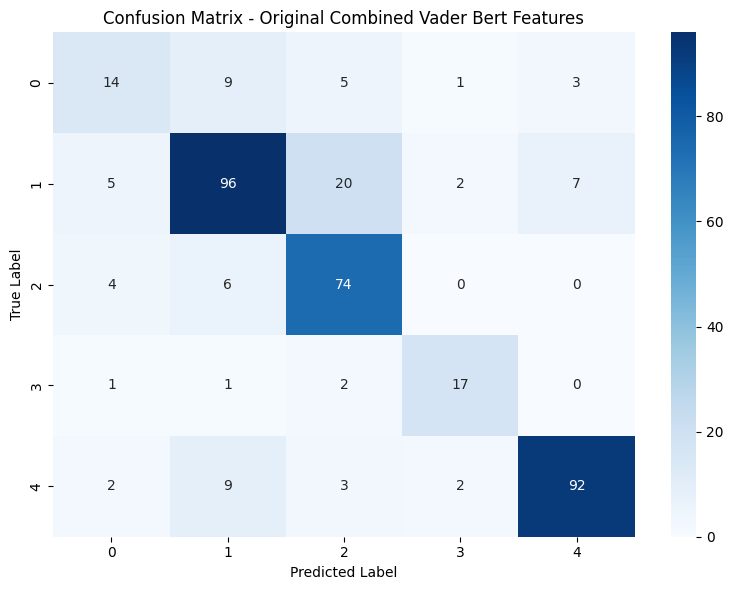


--- Reduced Features ---

Reduced Vader Bert Features (TruncatedSVD) - Classification Report:
              precision    recall  f1-score   support

   Ambiguous       0.47      0.50      0.48        32
       Mixed       0.82      0.72      0.76       130
    Negative       0.70      0.88      0.78        84
     Neutral       0.77      0.81      0.79        21
    Positive       0.90      0.83      0.87       108

    accuracy                           0.77       375
   macro avg       0.73      0.75      0.74       375
weighted avg       0.78      0.77      0.77       375



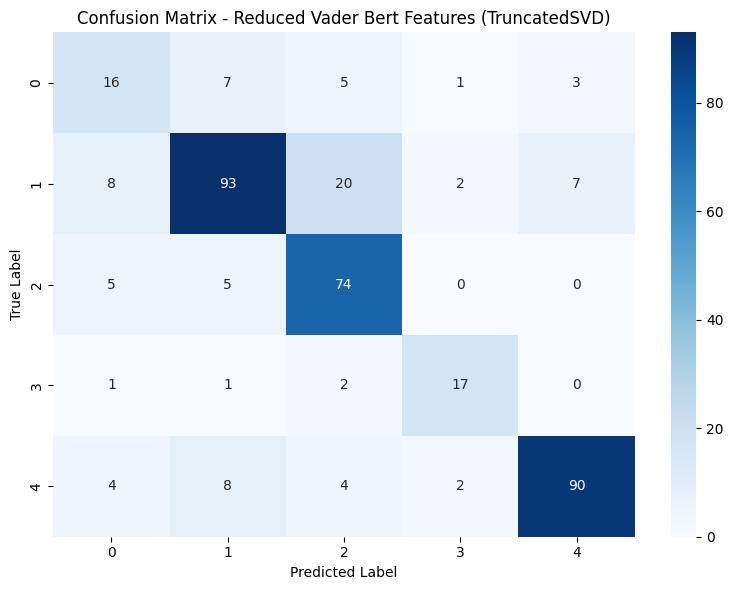


--- Comparative Analysis ---
Original Features Accuracy: 0.7813333333333333
Reduced Features Accuracy: 0.7733333333333333

Original Features Weighted F1: 0.7793370376095903
Reduced Features Weighted F1: 0.7745532788613231


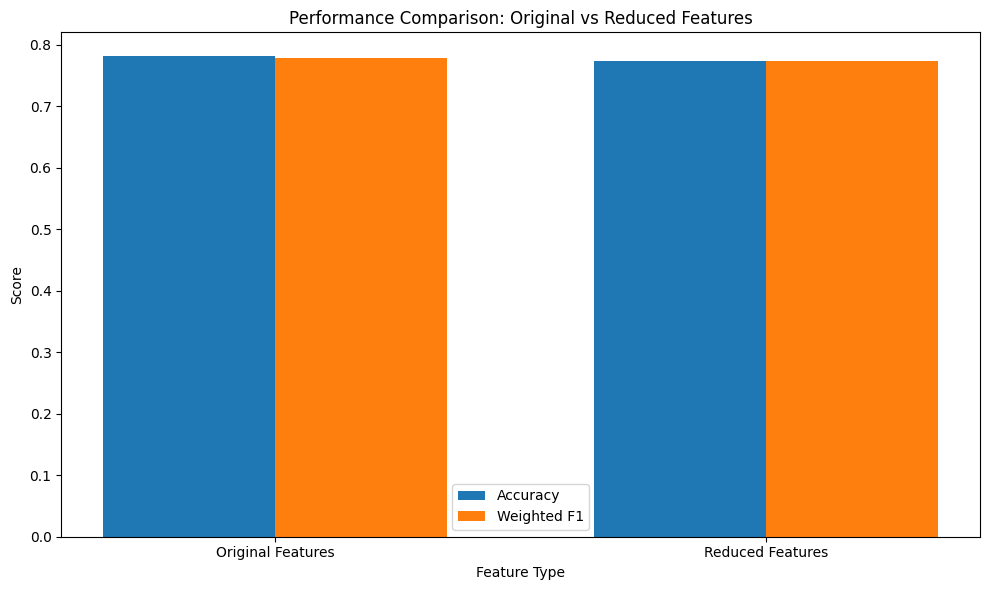

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For sparse matrices
svd = TruncatedSVD(n_components=500, random_state=420)
X_reduced = svd.fit_transform(combined_vader_bert)

# Explained variance ratio
print(f"Variance explained: {sum(svd.explained_variance_ratio_):.2%}")

# Original split
X_original_train, X_original_test, y_train, y_test = train_test_split(
    combined_vader_bert, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# Reduced features split
X_reduced_train, X_reduced_test, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

print("Original shape:", combined_vader_bert.shape)
print("Reduced shape:", X_reduced.shape)

# If you want to see the number of components


# Function to train, predict, and visualize
def evaluate_model(X_train, X_test, y_train, y_test, title):
    # Train Logistic Regression

    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y_sentiment), 
        y=y_sentiment
    )

# Convert to dictionary for sklearn
    class_weight_dict = dict(zip(np.unique(y_sentiment), class_weights))

# Use in Logistic Regression
    lr = LogisticRegression(
        class_weight=class_weight_dict,  # Gives more importance to minority class
        max_iter=1000
    )
    lr.fit(X_train, y_train)
    
    # Predict
    y_pred = lr.predict(X_test)
    
    # Classification Report
    print(f"\n{title} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    return lr, y_pred

# Evaluate original features
print("\n--- Original Features ---")
original_model, original_pred = evaluate_model(
    X_original_train, X_original_test, y_train, y_test, 
    "Original Combined Vader Bert Features"
)

# Evaluate reduced features
print("\n--- Reduced Features ---")
reduced_model, reduced_pred = evaluate_model(
    X_reduced_train, X_reduced_test, y_train_reduced, y_test_reduced, 
    "Reduced Vader Bert Features (TruncatedSVD)"
)

# Comparative Analysis
from sklearn.metrics import accuracy_score, f1_score

print("\n--- Comparative Analysis ---")
print("Original Features Accuracy:", accuracy_score(y_test, original_pred))
print("Reduced Features Accuracy:", accuracy_score(y_test_reduced, reduced_pred))
print("\nOriginal Features Weighted F1:", f1_score(y_test, original_pred, average='weighted'))
print("Reduced Features Weighted F1:", f1_score(y_test_reduced, reduced_pred, average='weighted'))

# Visualize performance comparison
performance_data = {
    'Original Features': {
        'Accuracy': accuracy_score(y_test, original_pred),
        'Weighted F1': f1_score(y_test, original_pred, average='weighted')
    },
    'Reduced Features': {
        'Accuracy': accuracy_score(y_test_reduced, reduced_pred),
        'Weighted F1': f1_score(y_test_reduced, reduced_pred, average='weighted')
    }
}

plt.figure(figsize=(10, 6))
feature_types = list(performance_data.keys())
accuracies = [data['Accuracy'] for data in performance_data.values()]
f1_scores = [data['Weighted F1'] for data in performance_data.values()]

x = np.arange(len(feature_types))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='Weighted F1')

plt.xlabel('Feature Type')
plt.ylabel('Score')
plt.title('Performance Comparison: Original vs Reduced Features')
plt.xticks(x, feature_types)
plt.legend()
plt.tight_layout()
plt.show()

# SMOTE :D

In [8]:
from imblearn.over_sampling import SMOTE

X = combined_vader_bert
# Apply SMOTE to balance classes
smote = SMOTE(random_state=420)
X_resampled, y_resampled = smote.fit_resample(X, y_sentiment)


--- Original Data ---

Original Data - Classification Report:
              precision    recall  f1-score   support

   Ambiguous       0.61      0.34      0.44        32
       Mixed       0.78      0.78      0.78       130
    Negative       0.70      0.88      0.78        84
     Neutral       0.89      0.76      0.82        21
    Positive       0.89      0.86      0.88       108

    accuracy                           0.79       375
   macro avg       0.78      0.72      0.74       375
weighted avg       0.79      0.79      0.78       375



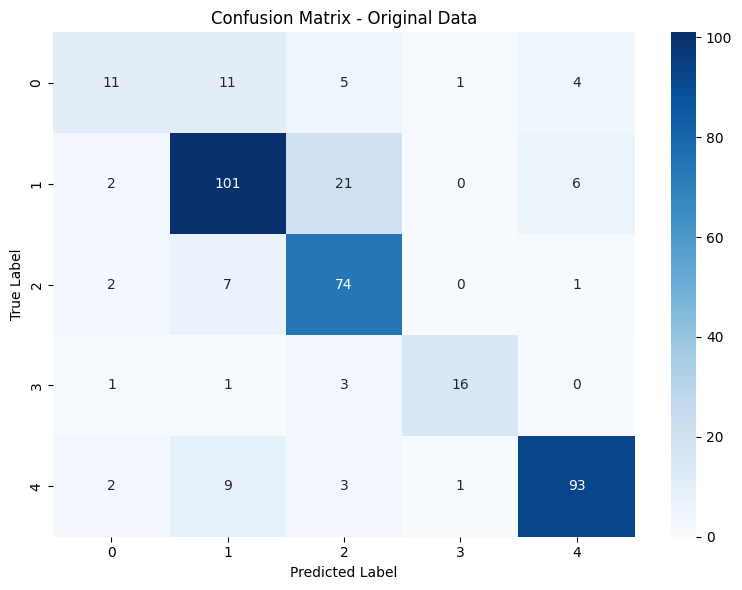


Training Data Class Distribution:
{'Ambiguous': 126, 'Mixed': 522, 'Negative': 335, 'Neutral': 82, 'Positive': 434}

--- SMOTE Resampled Data ---

SMOTE Resampled Data - Classification Report:
              precision    recall  f1-score   support

   Ambiguous       0.54      0.44      0.48        32
       Mixed       0.80      0.75      0.77       130
    Negative       0.70      0.88      0.78        84
     Neutral       0.76      0.76      0.76        21
    Positive       0.90      0.85      0.88       108

    accuracy                           0.78       375
   macro avg       0.74      0.74      0.74       375
weighted avg       0.78      0.78      0.78       375



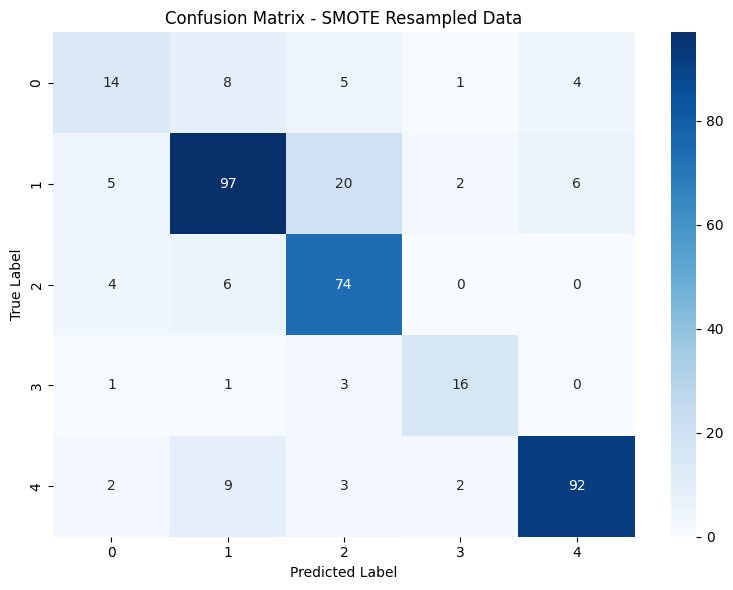


Training Data Class Distribution:
{'Ambiguous': 522, 'Mixed': 522, 'Negative': 522, 'Neutral': 522, 'Positive': 522}

--- Comparative Analysis ---
Original Data Accuracy: 0.7866666666666666
SMOTE Data Accuracy: 0.7813333333333333

Original Data Weighted F1: 0.7810320707979497
SMOTE Data Weighted F1: 0.7795539005808547


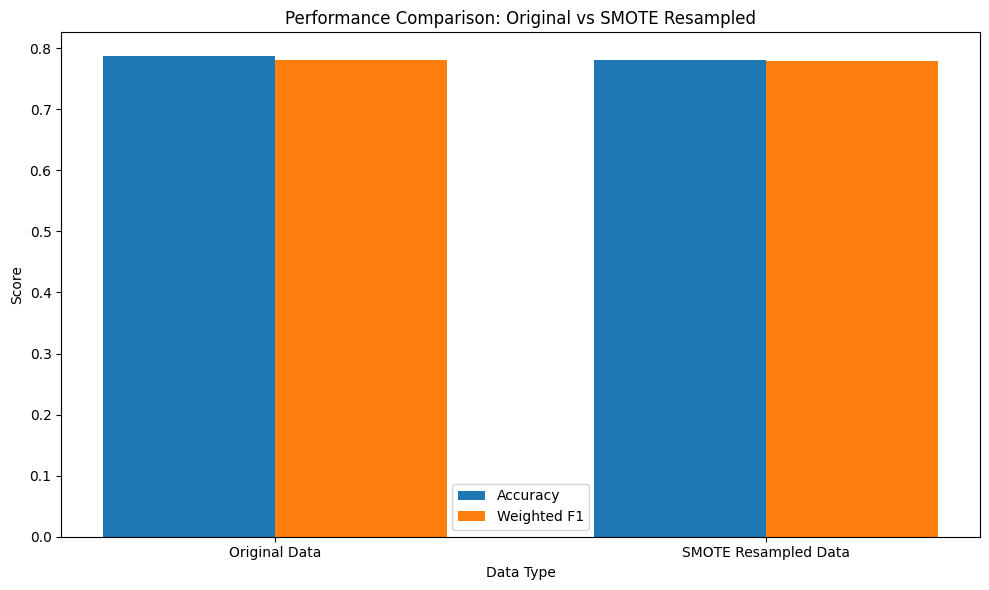

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Convert combined_vader_bert to numpy array if needed
X = combined_vader_bert

# Function to train, predict, and visualize
def evaluate_model(X, y, apply_smote=False, title="Model"):
    # Split data first
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=420, stratify=y
    )
    
    # Apply SMOTE only to training data if specified
    if apply_smote:
        smote = SMOTE(random_state=420)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Train Logistic Regression
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    
    # Predict
    y_pred = lr.predict(X_test)
    
    # Classification Report
    print(f"\n{title} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Class distribution before and after
    print("\nTraining Data Class Distribution:")
    unique, counts = np.unique(y_train, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return lr, y_pred, y_test

# Evaluate original data
print("\n--- Original Data ---")
original_model, original_pred, original_test = evaluate_model(
    X, y_sentiment, apply_smote=False, title="Original Data"
)

# Evaluate SMOTE-resampled data
print("\n--- SMOTE Resampled Data ---")
smote_model, smote_pred, smote_test = evaluate_model(
    X, y_sentiment, apply_smote=True, title="SMOTE Resampled Data"
)

# Comparative Analysis
from sklearn.metrics import accuracy_score, f1_score

print("\n--- Comparative Analysis ---")
print("Original Data Accuracy:", accuracy_score(original_test, original_pred))
print("SMOTE Data Accuracy:", accuracy_score(smote_test, smote_pred))
print("\nOriginal Data Weighted F1:", f1_score(original_test, original_pred, average='weighted'))
print("SMOTE Data Weighted F1:", f1_score(smote_test, smote_pred, average='weighted'))

# Visualize performance comparison
plt.figure(figsize=(10, 6))
data_types = ['Original Data', 'SMOTE Resampled Data']
accuracies = [
    accuracy_score(original_test, original_pred),
    accuracy_score(smote_test, smote_pred)
]
f1_scores = [
    f1_score(original_test, original_pred, average='weighted'),
    f1_score(smote_test, smote_pred, average='weighted')
]

x = np.arange(len(data_types))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='Weighted F1')

plt.xlabel('Data Type')
plt.ylabel('Score')
plt.title('Performance Comparison: Original vs SMOTE Resampled')
plt.xticks(x, data_types)
plt.legend()
plt.tight_layout()
plt.show()


----- Fine-tuning Sentiment Classifier with BERT Embeddings -----
Training BERT embeddings shape: (1499, 3657)
Training labels distribution: sentiment
Mixed        522
Positive     434
Negative     335
Ambiguous    126
Neutral       82
Name: count, dtype: int64

Training Logistic Regression with BERT embeddings...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
HyperParameter tuning - Logistic Regression Test Accuracy: 0.7813
Best parameters: {'C': 1.0, 'class_weight': {'Ambiguous': 2.3721518987341774, 'Mixed': 0.5748466257668712, 'Negative': 0.894510739856802, 'Neutral': 3.6388349514563108, 'Positive': 0.6915129151291513}, 'solver': 'liblinear'}
              precision    recall  f1-score   support

   Ambiguous       0.58      0.44      0.50        32
       Mixed       0.82      0.72      0.77       130
    Negative       0.70      0.89      0.79        84
     Neutral       0.80      0.76      0.78        21
    Positive       0.86      0.87      0.87       108

    

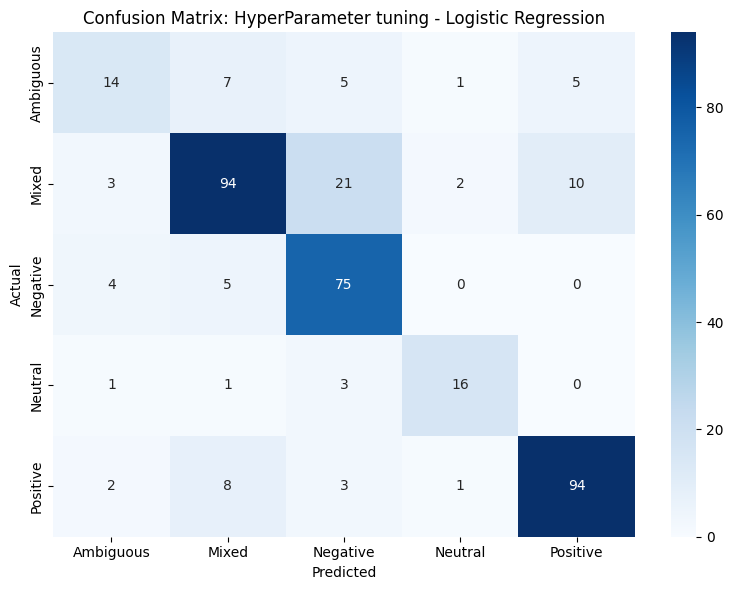


Training SVM with BERT embeddings...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
HyperParameter tuning - SVM Test Accuracy: 0.7467
Best parameters: {'C': 0.1, 'class_weight': {'Ambiguous': 2.3721518987341774, 'Mixed': 0.5748466257668712, 'Negative': 0.894510739856802, 'Neutral': 3.6388349514563108, 'Positive': 0.6915129151291513}, 'kernel': 'linear'}
              precision    recall  f1-score   support

   Ambiguous       0.45      0.44      0.44        32
       Mixed       0.79      0.68      0.73       130
    Negative       0.69      0.88      0.77        84
     Neutral       0.71      0.71      0.71        21
    Positive       0.86      0.82      0.84       108

    accuracy                           0.75       375
   macro avg       0.70      0.71      0.70       375
weighted avg       0.75      0.75      0.75       375



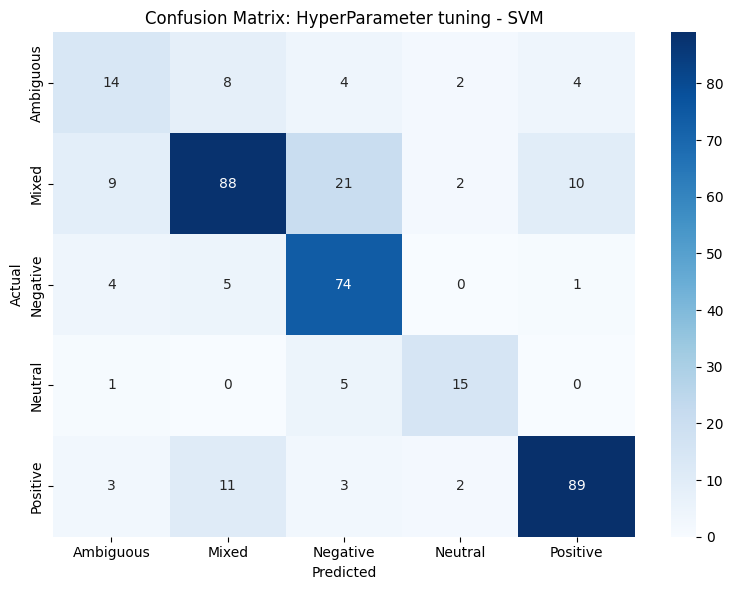


Best BERT model: HyperParameter tuning - Logistic Regression
Accuracy: 0.7813
Saved as 'best_bert_sentiment_model.pkl'

----- Updated Model Comparison with BERT Fine-tuning -----
                                          Model  Accuracy  F1 Score (weighted)
14    Combined vader bert - Logistic Regression  0.786667             0.781032
12      Combined All BERT - Logistic Regression  0.784000             0.777801
16  HyperParameter tuning - Logistic Regression  0.781333             0.777815
6   Combined All Features - Logistic Regression  0.757333             0.746639
10         Combined VADER - Logistic Regression  0.749333             0.739570
8            Combined NRC - Logistic Regression  0.749333             0.738913
17                  HyperParameter tuning - SVM  0.746667             0.745429
2            Bag of Words - Logistic Regression  0.746667             0.742694
7            Combined All Features - Linear SVM  0.733333             0.712125
5          Sentence Embeddings

<Figure size 1400x800 with 0 Axes>

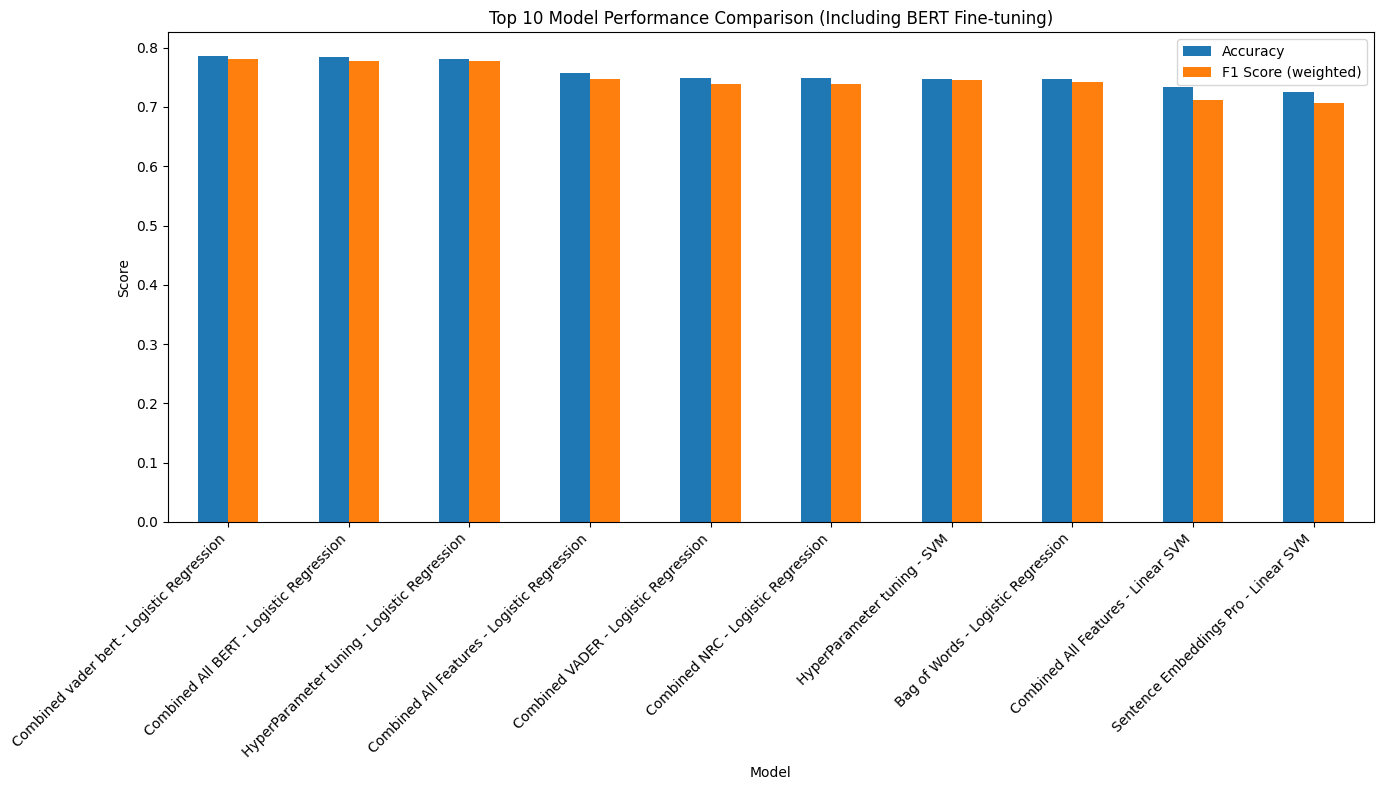


 Overall best model: Combined vader bert - Logistic Regression
Accuracy: 0.7867
F1 Score: 0.7810


In [10]:
#  Load BERT Embeddings and Train Specialized Classifier
print("\n----- Fine-tuning Sentiment Classifier with BERT Embeddings -----")

def train_bert_sentiment_classifier(X_train, X_test, y_train, y_test, model_name="BERT Fine-tuned"):
    """
    Train and evaluate classifier using pre-extracted BERT embeddings
    
    Parameters:
    - X_train: Training BERT embeddings
    - X_test: Testing BERT embeddings
    - y_train: Training sentiment labels
    - y_test: Testing sentiment labels
    - model_name: Name to identify this model
    
    Returns:
    - results: Dictionary with model and performance metrics
    """
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import joblib
    

    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y_sentiment), 
        y=y_sentiment
    )

# Convert to dictionary for sklearn
    class_weight_dict = dict(zip(np.unique(y_sentiment), class_weights))

    # Define more sophisticated models and hyperparameter grids
    bert_models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [0.1, 1.0,1.5,2,2.5,3],
                'solver': ['liblinear', 'saga', 'lbfgs'],
                'class_weight': [None, class_weight_dict]
            }
        },
        'SVM': {
            'model': SVC(probability=True),
            'params': {
                'C': [0.1, 1.0,1.5,2,2.5,3],
                'kernel': ['linear', 'rbf'],
                'class_weight': [None, class_weight_dict]
            }
        }
    }
    
    results = {}
    best_accuracy = 0
    best_model = None
    best_model_name = None
    
    # Print training dataset shape
    print(f"Training BERT embeddings shape: {X_train.shape}")
    print(f"Training labels distribution: {pd.Series(y_train).value_counts()}")
    
    # Train and evaluate each model
    for clf_name, clf_info in bert_models.items():
        print(f"\nTraining {clf_name} with BERT embeddings...")
        
        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(
            clf_info['model'], 
            clf_info['params'], 
            cv=5, 
            scoring='accuracy',
            verbose=1,
            n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        # Get best model
        model = grid_search.best_estimator_
        
        # Predict on test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store model performance
        full_name = f"{model_name} - {clf_name}"
        results[full_name] = {
            'model': model,
            'accuracy': accuracy,
            'best_params': grid_search.best_params_,
            'weighted_f1': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
        }
        
        # Print results
        print(f"{full_name} Test Accuracy: {accuracy:.4f}")
        print(f"Best parameters: {grid_search.best_params_}")
        print(classification_report(y_test, y_pred))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=sorted(pd.Series(y_test).unique()), 
                    yticklabels=sorted(pd.Series(y_test).unique()))
        plt.title(f'Confusion Matrix: {full_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()
        
        # Update best model if needed
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = full_name
    
    # Save the best model
    if best_model:
        joblib.dump(best_model, f'best_bert_sentiment_model.pkl')
        print(f"\nBest BERT model: {best_model_name}")
        print(f"Accuracy: {best_accuracy:.4f}")
        print(f"Saved as 'best_bert_sentiment_model.pkl'")
        
        # Save model info
        model_info = {
            'model_name': best_model_name,
            'accuracy': best_accuracy,
            'f1_score': results[best_model_name]['weighted_f1']
        }
        
        with open('best_bert_model_info.joblib', 'wb') as f:
            joblib.dump(model_info, f)
    
    return results

# Now train the BERT-based models
# Assuming X_allmini_trainpro contains your BERT embeddings


X_original_train, X_original_test, y_train, y_test = train_test_split(
    combined_vader_bert, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)


bert_results=train_bert_sentiment_classifier(X_original_train, X_original_test, y_train, y_test,"HyperParameter tuning")



# Add BERT results to the overall comparison
for model_name, metrics in bert_results.items():
    all_results[model_name] = {
        'accuracy': metrics['accuracy'],
        'weighted_f1': metrics['weighted_f1'],
        'model': metrics['model']
    }

# Create updated comparison table
updated_comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# Sort by Accuracy
updated_comparison_df = updated_comparison_df.sort_values('Accuracy', ascending=False)

# Display and save updated comparison
print("\n----- Updated Model Comparison with BERT Fine-tuning -----")
print(updated_comparison_df.head(10))
updated_comparison_df.to_csv('sentiment_model_comparison_with_bert.csv', index=False)

# Plot updated comparison for top 10 models
plt.figure(figsize=(14, 8))
updated_comparison_df.head(10).plot(
    x='Model', 
    y=['Accuracy', 'F1 Score (weighted)'], 
    kind='bar', 
    figsize=(14, 8)
)
plt.title('Top 10 Model Performance Comparison (Including BERT Fine-tuning)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find overall best model
overall_best_model = updated_comparison_df.iloc[0]['Model']
print(f"\n Overall best model: {overall_best_model}")
print(f"Accuracy: {updated_comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"F1 Score: {updated_comparison_df.iloc[0]['F1 Score (weighted)']:.4f}")

# Compare traditional models vs fine-tuned BERT
bert_models = [model for model in updated_comparison_df['Model'] if "BERT Fine-tuned" in model]
best_bert = updated_comparison_df[updated_comparison_df['Model'].isin(bert_models)].iloc[0] if bert_models else None

if best_bert is not None:
    print(f"Accuracy: {best_bert['Accuracy']:.4f}")
    print(f"F1 Score: {best_bert['F1 Score (weighted)']:.4f}")
    
    # Calculate improvement over best non-BERT model
    non_bert_models = [model for model in updated_comparison_df['Model'] if "BERT Fine-tuned" not in model]
    best_non_bert = updated_comparison_df[updated_comparison_df['Model'].isin(non_bert_models)].iloc[0]
    
    improvement = (best_bert['Accuracy'] - best_non_bert['Accuracy']) / best_non_bert['Accuracy'] * 100
    
    print(f"\nBest non-BERT model: {best_non_bert['Model']}")
    print(f"Accuracy: {best_non_bert['Accuracy']:.4f}")
    print(f"BERT improvement: {improvement:.2f}%")